<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_4_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Twitter_Data.csv.zip to Twitter_Data.csv.zip


Initial Shape: (162980, 2)
Columns: Index(['clean_text', 'category'], dtype='object')
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Accuracy: 0.8411364054734

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.71      0.78      7102
         0.0       0.82      0.89      0.86     11042
         1.0       0.85      0.86      0.86     14450

    accuracy                           0.84     32594
   macro avg       0.84      0.82      0.83     32594
weighted avg       0.84      0.84      0.84     32594



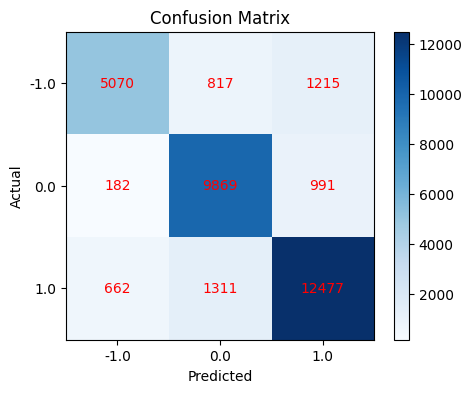


Sample Predictions:
I love this product, it’s amazing! --> 1.0
This is the worst experience ever. --> -1.0
It's okay, not too bad. --> -1.0


In [3]:
import zipfile
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
zip_path = "Twitter_Data.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    csv_filename = z.namelist()[0]
    df = pd.read_csv(z.open(csv_filename), encoding_errors='ignore')

print("Initial Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())
text_col = "clean_text"
label_col = "category"
df = df[[text_col, label_col]].dropna()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.strip()

df[text_col] = df[text_col].apply(clean_text)
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
classes = sorted(df[label_col].unique())
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.colorbar()
plt.show()
sample_texts = [
    "I love this product, it’s amazing!",
    "This is the worst experience ever.",
    "It's okay, not too bad."
]
sample_clean = [clean_text(t) for t in sample_texts]
sample_tfidf = vectorizer.transform(sample_clean)
predictions = model.predict(sample_tfidf)

print("\nSample Predictions:")
for txt, pred in zip(sample_texts, predictions):
    print(f"{txt} --> {pred}")


In [ ]:
import zipfile
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
zip_path = "Twitter_Data.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    csv_filename = z.namelist()[0]
    df = pd.read_csv(z.open(csv_filename), encoding_errors='ignore')

print("Dataset shape:", df.shape)
print(df.head())
text_col = "clean_text"
label_col = "category"
df = df[[text_col, label_col]].dropna()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.strip()

df[text_col] = df[text_col].apply(clean_text)
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Number of features extracted:", len(vectorizer.get_feature_names_out()))
print("Sample features:", vectorizer.get_feature_names_out()[:20])


Dataset shape: (162980, 2)
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
Number of features extracted: 948025
Sample features: ['000' '000 21000' '000 333' '000 buy' '000 clean' '000 crore' '000 crs'
 '000 death' '000 income' '000 knowledge' '000 month' '000 pocket'
 '000 poor' '000 problem' '000 promised' '000 vanautunear' '000 year'
 '0000' '0000 seat' '00000']


Dataset shape: (162980, 2)
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

--- Logistic Regression ---
Accuracy: 0.8411
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.71      0.78      7102
         0.0       0.82      0.89      0.86     11042
         1.0       0.85      0.86      0.86     14450

    accuracy                           0.84     32594
   macro avg       0.84      0.82      0.83     32594
weighted avg       0.84      0.84      0.84     32594


--- Multinomial Naive Bayes ---
Accuracy: 0.5440
Classification Report:
               precision    recall  f1-score   support

        -1.0   

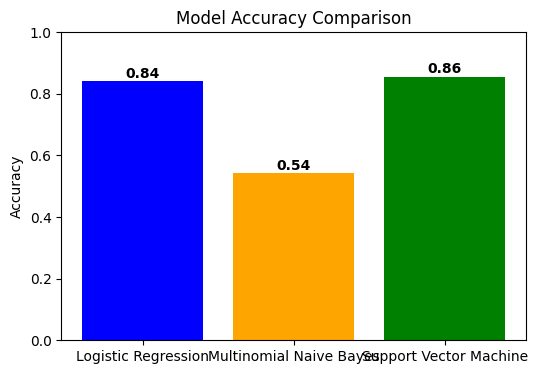

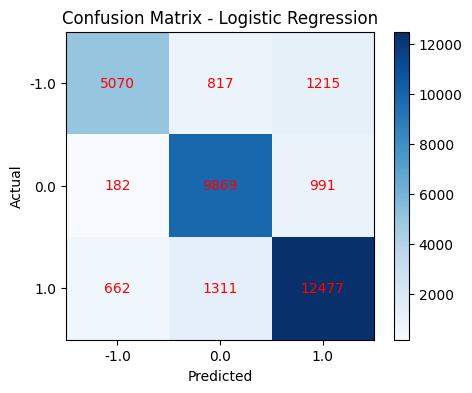

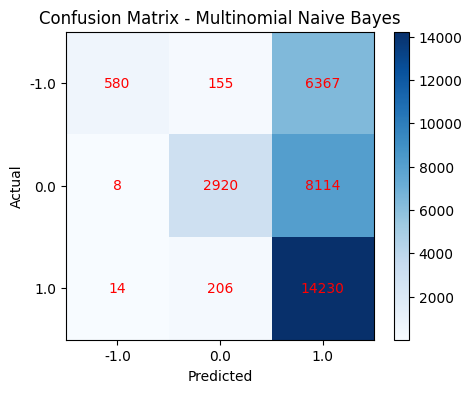

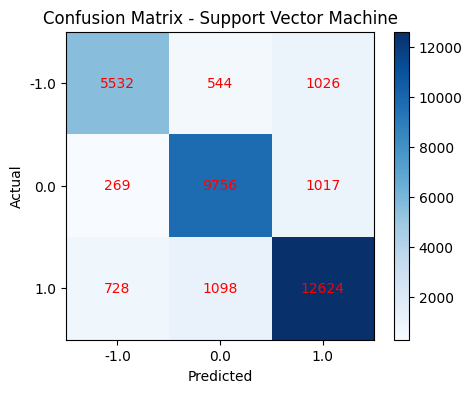

In [ ]:
import zipfile
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
zip_path = "Twitter_Data.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    csv_filename = z.namelist()[0]
    df = pd.read_csv(z.open(csv_filename), encoding_errors='ignore')

print("Dataset shape:", df.shape)
print(df.head())
text_col = "clean_text"
label_col = "category"

df = df[[text_col, label_col]].dropna()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.strip()

df[text_col] = df[text_col].apply(clean_text)
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC()
}
accuracies = {}
predictions = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    predictions[model_name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6,4))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
classes = sorted(df[label_col].unique())
for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

    plt.colorbar()
    plt.show()


In [4]:
import zipfile
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

zip_path = "Twitter_Data.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    csv_filename = z.namelist()[0]
    df = pd.read_csv(z.open(csv_filename), encoding_errors='ignore')

text_col = "clean_text"
label_col = "category"
df = df[[text_col, label_col]].dropna()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s#@]", "", text)
    return text.strip()

df[text_col] = df[text_col].apply(clean_text)
df["char_count"] = df[text_col].apply(len)
df["word_count"] = df[text_col].apply(lambda x: len(x.split()))
df["hashtag_count"] = df[text_col].apply(lambda x: x.count("#"))
df["mention_count"] = df[text_col].apply(lambda x: x.count("@"))
df["uppercase_word_count"] = 0
num_cols = ["char_count", "word_count", "hashtag_count", "mention_count", "uppercase_word_count"]

X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

train_features = df.loc[X_train.index, num_cols]
test_features = df.loc[X_test.index, num_cols]

scaler = StandardScaler(with_mean=False)
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

X_train_final = hstack([X_train_tfidf, train_features_scaled], format="csr")
X_test_final = hstack([X_test_tfidf, test_features_scaled], format="csr")

model = LogisticRegression(solver="saga", max_iter=2000, n_jobs=-1, random_state=42)
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8258268392955759
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.85      0.67      0.75      7102
         0.0       0.79      0.90      0.84     11042
         1.0       0.85      0.84      0.85     14450

    accuracy                           0.83     32594
   macro avg       0.83      0.81      0.81     32594
weighted avg       0.83      0.83      0.82     32594

